In [1]:
# Import all necessary libraries and packages into the kernel. 
# Install mlxtend using !pip in order to import TransactionEncoder.

!pip install mlxtend
import pandas as pd
from pandas import Series, DataFrame
from mlxtend.preprocessing import TransactionEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [2]:
# Load needed data set market basket
df = pd.read_csv('C://Users//cseba//Documents//WGU//D212 Data Mining II//Performance Assessment//OFM3 Task 3 - Association Rules and List Analysis//Dataset and Dictionary//teleco_market_basket.csv')

In [3]:
# get a view of the data set structure by displaying a transaction.
df.loc[3]

Item01    Apple Lightning to Digital AV Adapter
Item02         TP-Link AC1750 Smart WiFi Router
Item03                             Apple Pencil
Item04                                      NaN
Item05                                      NaN
Item06                                      NaN
Item07                                      NaN
Item08                                      NaN
Item09                                      NaN
Item10                                      NaN
Item11                                      NaN
Item12                                      NaN
Item13                                      NaN
Item14                                      NaN
Item15                                      NaN
Item16                                      NaN
Item17                                      NaN
Item18                                      NaN
Item19                                      NaN
Item20                                      NaN
Name: 3, dtype: object

In [4]:
# check.info to see number of columns and number of non-nulls in the data set.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Item01  7501 non-null   object
 1   Item02  5747 non-null   object
 2   Item03  4389 non-null   object
 3   Item04  3345 non-null   object
 4   Item05  2529 non-null   object
 5   Item06  1864 non-null   object
 6   Item07  1369 non-null   object
 7   Item08  981 non-null    object
 8   Item09  654 non-null    object
 9   Item10  395 non-null    object
 10  Item11  256 non-null    object
 11  Item12  154 non-null    object
 12  Item13  87 non-null     object
 13  Item14  47 non-null     object
 14  Item15  25 non-null     object
 15  Item16  8 non-null      object
 16  Item17  4 non-null      object
 17  Item18  4 non-null      object
 18  Item19  3 non-null      object
 19  Item20  1 non-null      object
dtypes: object(20)
memory usage: 2.3+ MB


In [5]:
# Remove rows with not null values

df = df[df['Item01'].notna()]

df.shape

(7501, 20)

In [6]:
# get a quick visual and check if rows of NAs still exist.
df

,Item01,Item02,Item03,Item04,Item05,Item06,Item07,Item08,Item09,Item10,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Item20
1,Logitech M510 Wireless mouse,HP 63 Ink,HP 65 ink,nonda USB C to USB Adapter,10ft iPHone Charger Cable,HP 902XL ink,Creative Pebble 2.0 Speakers,Cleaning Gel Universal Dust Cleaner,Micro Center 32GB Memory card,YUNSONG 3pack 6ft Nylon Lightning Cable,TopMate C5 Laptop Cooler pad,Apple USB-C Charger cable,HyperX Cloud Stinger Headset,TONOR USB Gaming Microphone,Dust-Off Compressed Gas 2 pack,3A USB Type C Cable 3 pack 6FT,HOVAMP iPhone charger,SanDisk Ultra 128GB card,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses
3,Apple Lightning to Digital AV Adapter,TP-Link AC1750 Smart WiFi Router,Apple Pencil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,UNEN Mfi Certified 5-pack Lightning Cable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Cat8 Ethernet Cable,HP 65 ink,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Dust-Off Compressed Gas 2 pack,Screen Mom Screen Cleaner kit,Moread HDMI to VGA Adapter,HP 62XL Tri-Color ink,Apple USB-C Charger cable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14993,SanDisk 32GB Ultra SDHC card,Vsco 70 pack stickers,SanDisk 128GB microSDXC card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14995,Apple Lightning to Digital AV Adapter,Nylon Braided Lightning to USB cable,Apple Pencil,USB 2.0 Printer cable,ARRIS SURFboard SB8200 Cable Modem,Apple USB-C Charger cable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14997,Falcon Dust Off Compressed Gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14999,HP 63XL Ink,Apple USB-C Charger cable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# df converted into List of lists (lol)

rows = []
for i in range(0, 7501): 
   rows.append([str(df.values[i,j])
for j in range (0, 20)])

In [8]:
# transaction encoder is applied

encoder = TransactionEncoder()

array = encoder.fit(rows).transform(rows)



# the array is returned to df (dataframe)

transaction = pd.DataFrame(array, columns = encoder.columns_)

# View the data set to ensure it looks correct.

transaction

,10ft iPHone Charger Cable,10ft iPHone Charger Cable 2 Pack,3 pack Nylon Braided Lightning Cable,3A USB Type C Cable 3 pack 6FT,5pack Nylon Braided USB C cables,ARRIS SURFboard SB8200 Cable Modem,Anker 2-in-1 USB Card Reader,Anker 4-port USB hub,Anker USB C to HDMI Adapter,Apple Lightning to Digital AV Adapter,...,iFixit Pro Tech Toolkit,iPhone 11 case,iPhone 12 Charger cable,iPhone 12 Pro case,iPhone 12 case,iPhone Charger Cable Anker 6ft,iPhone SE case,nan,nonda USB C to USB Adapter,seenda Wireless mouse
0,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
7497,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [9]:
# View columns of newly encoded dataset

for col in transaction.columns:
    print(col)

10ft iPHone Charger Cable
10ft iPHone Charger Cable 2 Pack
3 pack Nylon Braided Lightning Cable
3A USB Type C Cable 3 pack 6FT
5pack Nylon Braided USB C cables
ARRIS SURFboard SB8200 Cable Modem
Anker 2-in-1 USB Card Reader
Anker 4-port USB hub
Anker USB C to HDMI Adapter
Apple Lightning to Digital AV Adapter
Apple Lightning to USB cable
Apple Magic Mouse 2
Apple Pencil
Apple Pencil 2nd Gen
Apple Power Adapter Extension Cable
Apple USB-C Charger cable
AutoFocus 1080p Webcam
BENGOO G90000 headset
Blue Light Blocking Glasses
Blue Light Blocking Glasses 2pack
Brother Genuine High Yield Toner Cartridge
Cat 6 Ethernet Cable 50ft
Cat8 Ethernet Cable
CicTsing MM057 2.4G Wireless Mouse
Cleaning Gel Universal Dust Cleaner
Creative Pebble 2.0 Speakers
DisplayPort ot HDMI adapter
Dust-Off Compressed Gas
Dust-Off Compressed Gas 2 pack
FEEL2NICE 5 pack 10ft Lighning cable
FEIYOLD Blue light Blocking Glasses
Falcon Dust Off Compressed Gas
HOVAMP Mfi 6pack Lightning Cable
HOVAMP iPhone charger
HP 61 

In [10]:
# Remove the last NAN column in order to complete data cleaning step of having 7501 rows x 119 columns

clean_df = transaction.drop(['nan'], axis = 1)
clean_df.head(7505)

,10ft iPHone Charger Cable,10ft iPHone Charger Cable 2 Pack,3 pack Nylon Braided Lightning Cable,3A USB Type C Cable 3 pack 6FT,5pack Nylon Braided USB C cables,ARRIS SURFboard SB8200 Cable Modem,Anker 2-in-1 USB Card Reader,Anker 4-port USB hub,Anker USB C to HDMI Adapter,Apple Lightning to Digital AV Adapter,...,hP 65 Tri-color ink,iFixit Pro Tech Toolkit,iPhone 11 case,iPhone 12 Charger cable,iPhone 12 Pro case,iPhone 12 case,iPhone Charger Cable Anker 6ft,iPhone SE case,nonda USB C to USB Adapter,seenda Wireless mouse
0,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
# Save successfully prepared and cleaned data set
clean_df.to_csv('C://Users//cseba//Documents//WGU//D212 Data Mining II//Performance Assessment//OFM3 Task 3 - Association Rules and List Analysis//D212_Task3_Cleaned_Datasetv2.csv')

In [12]:
# Import apriori and association rules packages

from mlxtend.frequent_patterns import apriori, association_rules

import warnings
warnings.filterwarnings('ignore')


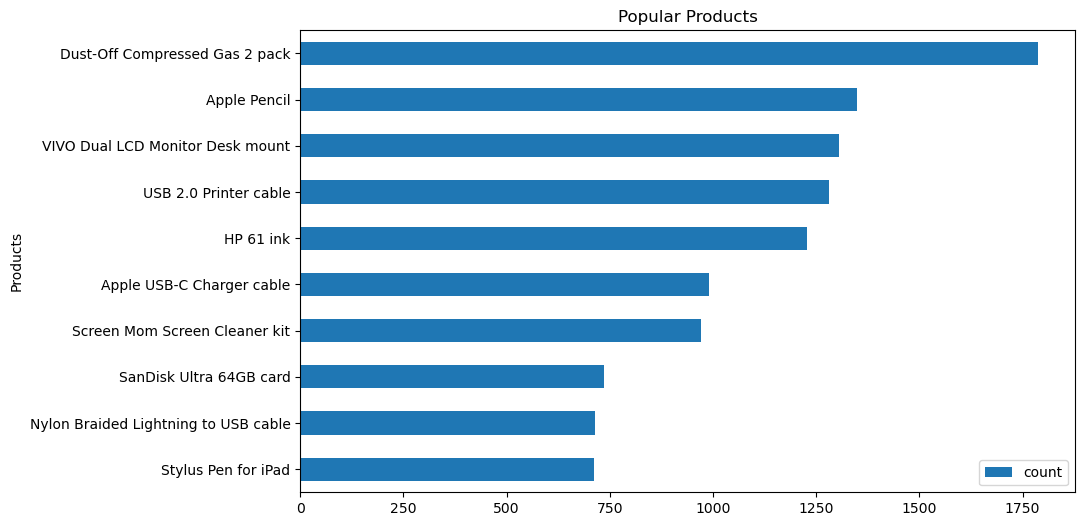

In [13]:
# Display the top 10 products by count

count = clean_df.loc[:,:].sum()
pop_item = count.sort_values(0,ascending = False).head(10)
pop_item = pop_item.to_frame()
pop_item = pop_item.reset_index()
pop_item = pop_item.rename(columns = {'index': 'Products',0: 'count'})

# Data Visualization
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)
ax = pop_item.plot.barh(x = 'Products', y = 'count')
plt.title('Popular Products')
plt.gca().invert_yaxis()

In [14]:
# Create Apriori object - rules - starting with setting a threshold based on 0.02 for support. This will filter out any
# transactional observations that do not include an association rule.

rules = apriori(clean_df, min_support = 0.02, use_colnames = True)
rules

,support,itemsets
0,0.050527,(10ft iPHone Charger Cable 2 Pack)
1,0.042528,(3A USB Type C Cable 3 pack 6FT)
2,0.029463,(Anker 2-in-1 USB Card Reader)
3,0.068391,(Anker USB C to HDMI Adapter)
4,0.087188,(Apple Lightning to Digital AV Adapter)
...,...,...
98,0.023730,"(USB 2.0 Printer cable, Screen Mom Screen Clea..."
99,0.035462,"(Screen Mom Screen Cleaner kit, VIVO Dual LCD ..."
100,0.020131,"(USB 2.0 Printer cable, Stylus Pen for iPad)"
101,0.025197,"(VIVO Dual LCD Monitor Desk mount, Stylus Pen ..."


In [15]:
# Create the Rules Table with a minimal threshold of 1 for measuring the "Lift." The value of 1 is used because
# any value greater than 1 would indicate that the products being purchased have a strong connection.

rule_table = association_rules(rules, metric = 'lift', min_threshold = 1)
rule_table.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Dust-Off Compressed Gas 2 pack),(10ft iPHone Charger Cable 2 Pack),0.238368,0.050527,0.023064,0.096756,1.914955,0.011020,1.051182,0.627330
1,(10ft iPHone Charger Cable 2 Pack),(Dust-Off Compressed Gas 2 pack),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,0.503221
2,(Dust-Off Compressed Gas 2 pack),(Anker USB C to HDMI Adapter),0.238368,0.068391,0.024397,0.102349,1.496530,0.008095,1.037830,0.435627
3,(Anker USB C to HDMI Adapter),(Dust-Off Compressed Gas 2 pack),0.068391,0.238368,0.024397,0.356725,1.496530,0.008095,1.183991,0.356144
4,(Anker USB C to HDMI Adapter),(VIVO Dual LCD Monitor Desk mount),0.068391,0.174110,0.020931,0.306043,1.757755,0.009023,1.190117,0.462740
5,(VIVO Dual LCD Monitor Desk mount),(Anker USB C to HDMI Adapter),0.174110,0.068391,0.020931,0.120214,1.757755,0.009023,1.058905,0.521973
6,(Apple Lightning to Digital AV Adapter),(Apple Pencil),0.087188,0.179709,0.028796,0.330275,1.837830,0.013128,1.224818,0.499424
7,(Apple Pencil),(Apple Lightning to Digital AV Adapter),0.179709,0.087188,0.028796,0.160237,1.837830,0.013128,1.086988,0.555754
8,(Dust-Off Compressed Gas 2 pack),(Apple Lightning to Digital AV Adapter),0.238368,0.087188,0.024397,0.102349,1.173883,0.003614,1.016889,0.194486
9,(Apple Lightning to Digital AV Adapter),(Dust-Off Compressed Gas 2 pack),0.087188,0.238368,0.024397,0.279817,1.173883,0.003614,1.057552,0.162275


In [16]:
# Display top three observations based on a measured lift > 1.8 and a measured confidence of > 0.34.

top_three_rules = rule_table[(rule_table['confidence'] > 0.34) & (rule_table['lift'] > 1.8)].sort_values('lift', 
                ascending=False).head(3)
top_three_rules.head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
85,(SanDisk Ultra 64GB card),(VIVO Dual LCD Monitor Desk mount),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,0.624943
64,(FEIYOLD Blue light Blocking Glasses),(VIVO Dual LCD Monitor Desk mount),0.065858,0.174110,0.022930,0.348178,1.999758,0.011464,1.267048,0.535186
1,(10ft iPHone Charger Cable 2 Pack),(Dust-Off Compressed Gas 2 pack),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,0.503221


In [17]:
# Count the total number occurrences for each antecedents when setting the threshold of 1 or greater for the measured Lift.

rule_table.antecedents.value_counts()

(Dust-Off Compressed Gas 2 pack)           18
(VIVO Dual LCD Monitor Desk mount)         12
(Apple Pencil)                              9
(HP 61 ink)                                 8
(Screen Mom Screen Cleaner kit)             7
(USB 2.0 Printer cable)                     6
(Nylon Braided Lightning to USB cable)      5
(Apple Lightning to Digital AV Adapter)     4
(Apple USB-C Charger cable)                 4
(Stylus Pen for iPad)                       4
(SanDisk Ultra 64GB card)                   4
(Anker USB C to HDMI Adapter)               2
(FEIYOLD Blue light Blocking Glasses)       2
(Logitech M510 Wireless mouse)              2
(10ft iPHone Charger Cable 2 Pack)          1
(Falcon Dust Off Compressed Gas)            1
(HP 62XL Tri-Color ink)                     1
(Premium Nylon USB Cable)                   1
(SanDisk Ultra 128GB card)                  1
(Syntech USB C to USB Adapter)              1
(TopMate C5 Laptop Cooler pad)              1
Name: antecedents, dtype: int64

In [18]:
# Save successfully created rule_table with association rules
rule_table.to_csv('C://Users//cseba//Documents//WGU//D212 Data Mining II//Performance Assessment//OFM3 Task 3 - Association Rules and List Analysis//D212_Rule_Table_Dataset.csv')